## CatsVsDogs

## Data Pre-processing

In [ ]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split

In [ ]:
path = os.listdir("C:\\Users\\Unzela Inamdar\\Desktop\\train")
cls_img = []
for x in path:
    output = x.split('.')[0]
    if(output == 'dog'):
        cls_img.append('dog')
    else:
        cls_img.append('cat')
df = pd.DataFrame({'filename':path, 'class':cls_img})

## Split the data

In [ ]:
tr, te = train_test_split(df, test_size=0.2, random_state=42)
total_tr = tr.shape[0]
total_te = te.shape[0]

In [ ]:
tr = tr.reset_index(drop=True)
te = te.reset_index(drop=True)

In [ ]:
tr_gen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

val_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
tr_generator = tr_gen.flow_from_dataframe(
    tr, 
    "C://Users//HP//Desktop//CatvsDogs//train", 
    x_col='filename',
    y_col='class',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=15
)

Found 20000 validated image filenames belonging to 2 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_dataframe(
    te, 
    "C://Users//HP//Desktop//CatvsDogs//train", 
    x_col='filename',
    y_col='class',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=15
)

Found 5000 validated image filenames belonging to 2 classes.


## CNN Model

## With Regularisation

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) 

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 128)      

## Train the model

In [ ]:
history = model.fit(
    tr_generator, 
    epochs=10,
    validation_data=val_generator
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1334 steps, validate for 334 steps
Epoch 1/10
1334/1334 [==============================] - 127s 95ms/step - loss: 0.6894 - accuracy: 0.5511 - val_loss: 0.6418 - val_accuracy: 0.6348
Epoch 2/10
1334/1334 [==============================] - 117s 87ms/step - loss: 0.6276 - accuracy: 0.6557 - val_loss: 0.5975 - val_accuracy: 0.6872
Epoch 3/10
1334/1334 [==============================] - 118s 88ms/step - loss: 0.5724 - accuracy: 0.7064 - val_loss: 0.5095 - val_accuracy: 0.7620
Epoch 4/10
1334/1334 [==============================] - 116s 87ms/step - loss: 0.5302 - accuracy: 0.7364 - val_loss: 0.4694 - val_accuracy: 0.7842
Epoch 5/10
1334/1334 [==============================] - 115s 86ms/step - loss: 0.4993 - accuracy: 0.7620 - val_loss: 0.4985 - val_accuracy: 0.7628
Epoch 6/10
1334/1334 [==============================] - 115s 86ms/step - loss: 0.4803 - accuracy: 0.7734 - val_loss: 0.4165 - val_accuracy: 0.8084
Epoch 7/10
1334/1334 [=

In [ ]:
model.save("Cat_vs_Dog.h5")

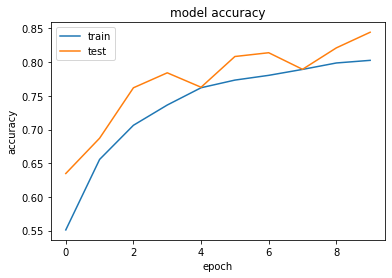

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

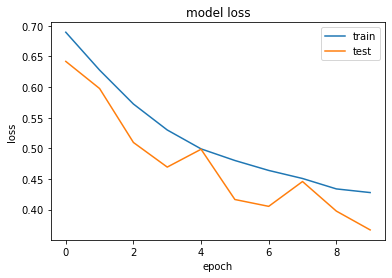

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
model.evaluate(tr_generator)

  ...
    to  
  ['...']
1334/1334 [==============================] - 103s 77ms/step - loss: 0.3861 - accuracy: 0.8305


[0.38613667222357045, 0.8305]

In [ ]:
model.evaluate(val_generator)

  ...
    to  
  ['...']
334/334 [==============================] - 10s 30ms/step - loss: 0.3669 - accuracy: 0.8444


[0.3669226566206909, 0.8444]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
pred = model.predict(val_generator)

In [ ]:
import numpy as np
test_pred = np.argmax(pred, axis=-1)

In [ ]:
result = confusion_matrix(val_generator.classes, test_pred)
print("Confusion Matrix: ")
print(result)

Confusion Matrix: 
[[1191 1324]
 [1216 1269]]


In [ ]:
print(classification_report(val_generator.classes, test_pred))

precision    recall  f1-score   support

           0       0.49      0.47      0.48      2515
           1       0.49      0.51      0.50      2485

    accuracy                           0.49      5000
   macro avg       0.49      0.49      0.49      5000
weighted avg       0.49      0.49      0.49      5000

